# Worksheet 07

Name: Matias Ou 
UID: U34955662

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

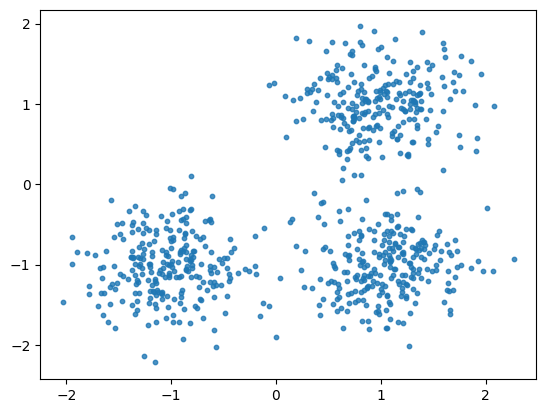

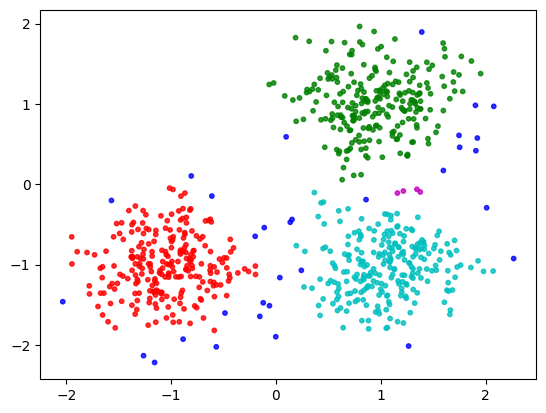

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():
    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assingments = [ 0 for _ in range (len(self.dataset))] # 0 means that it has not yet been assigned 

    def get_neighbors(self, i):
        neighbors = []
        for j in range(len(self.dataset)):
            if i != j and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon: # EUCLIDIAN DISTANCE
                neighbors.append(j)
        return neighbors

    def is_core(self, i):
        neighbors = self.get_neighbors(i)
        return len(neighbors) >= self.min_pts

    def assign(self, i, cluster):
        self.assingments[i] = cluster
        neighbors = self.get_neighbors(i)
        for neighbor in neighbors:
            if self.assingments[neighbor] == 0:
                self.assign(neighbor, cluster)

        return
   


    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """ 
        
        cluster = 1
        for i in range(len(self.dataset)):
            if self.is_core(i) and self.assingments[i] == 0:
                self.assign(i, cluster)
                cluster += 1
        
        return self.assingments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 40)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()